# Phase 1 : Détection et reconnaissance par attributs

## Paramètres

In [31]:
import cv2 as cv

face_cascade = cv.CascadeClassifier('./Ressources/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('./Ressources/haarcascade_eye.xml')

img = cv.imread('../Image/img_label_3.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Dimension de l'image capturée pour avoir des données uniforme.
desired_width = 24
desired_height = 24

scale_factor = 1.3 # Un facteur plus petit augmente la chance de détecter des visages plus petits, mais peut aussi augmenter les faux positifs.
min_neighbors = 5 # Augmenter cette valeur réduit les faux positifs. Cela définit le nombre de voisins qu'un rectangle doit avoir pour être retenu.

nb_label = 30;

In [ ]:
# Pour mettre à jour la fonction, nous allons supposer que les cascades sont chargées et passées à la fonction.
# Voici la fonction mise à jour qui dessine des rectangles autour des yeux détectés :

import cv2 as cv
import numpy as np

def vectoriser_oeil_v2(photo_personnalite, face_cascade = face_cascade, eye_cascade = eye_cascade, desired_width=24, desired_height=24, scale_factor=1.3, min_neighbors=5, show_results=False):
    if photo_personnalite is None:
        print("L'image fournie est vide. Vérifiez le chemin de l'image.")
        return None

    gray = cv.cvtColor(photo_personnalite, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scale_factor, min_neighbors)

    vecteurs_oeils = []

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) == 0:
            # Aucun œil détecté
            return None 
        for (ex, ey, ew, eh) in eyes:
            eye_roi = roi_gray[ey: ey + eh, ex: ex + ew]
            resized_eye = cv.resize(eye_roi, (desired_width, desired_height))
            eye_vector_normalized = resized_eye.flatten() / 255.0
            vecteurs_oeils.append(eye_vector_normalized)

            if show_results:
                # Dessiner un rectangle autour de l'œil détecté sur l'image en couleur
                cv.rectangle(photo_personnalite, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (0, 255, 0), 2)
                
                plt.imshow(photo_personnalite)
                plt.imshow(cv.cvtColor(photo_personnalite, cv.COLOR_BGR2RGB))
                plt.title("Image d'entré")
                plt.show()
                
                plt.imshow(cv.resize(eye_roi, (desired_width, desired_height)), cmap='gray')
                plt.title("Œil Détecté")
                plt.show()
                
                plt.plot(eye_vector_normalized)
                plt.title("Vecteur de l'Œil Normalisé")
                plt.show()

    if show_results:
        # Afficher l'image originale avec les rectangles dessinés autour des yeux
        cv.imshow('Yeux détectés', photo_personnalite)
        cv.waitKey(0)
        cv.destroyAllWindows()
        

    return vecteurs_oeils

# Note: Cette fonction ne peut pas être exécutée ici car nous n'avons pas accès à un environnement graphique,
# mais vous pouvez l'exécuter dans votre environnement local après avoir chargé les cascades et l'image appropriée.


In [30]:
# Étape 1 : Lire le Fichier JSON

import json

# Charger le fichier JSON
with open('../Data/sorted_by_label.json', 'r') as file:
    data = json.load(file)

# Utiliser seulement les nb_label premiers labels
selected_labels = list(data['data'].keys())[:nb_label]

# Étape 2 : Calculer les Vecteurs pour Chaque Image

vectors_by_class = {label: [] for label in selected_labels}

for label in selected_labels:
    for image_name in data['data'][label]:
        img_path = f'../Image/img_align_celeba/img_align_celeba/{image_name}'
        img = cv.imread(img_path)
        # Assurez-vous que l'image a été chargée correctement
        print(img)
        if img is not None:
            # vecteurs = vectoriser_oeil(img, show_results=False)
            vecteurs = vectoriser_oeil_v2(img, show_results=False)
            
            if vecteurs is not None:
                vectors_by_class[label].extend(vecteurs)
            else:
                print(f"Aucun œil détecté pour l'image {image_name}")

# Étape 3 : Calculer le Vecteur Moyen pour Chaque Label

mean_vectors = {}
for label, vectors in vectors_by_class.items():
    # Vérifier que tous les vecteurs ont la même longueur
    if all(len(vec) == len(vectors[0]) for vec in vectors):
        mean_vectors[label] = np.mean(vectors, axis=0).tolist()
        print(f"Success : Les vecteurs pour le label {label} ont la même longueur.")
    else:
        print(f"Erreur : Les vecteurs pour le label {label} n'ont pas la même longueur.")

# Étape 4 : Enregistrer en Format JSON

with open('../Data/mean_vectors.json', 'w') as json_file:
    json.dump(mean_vectors, json_file, indent=4) # Indent = Nombre d'espaces à chaque colonne du fichier JSON (améliore la lecture du fichier)
    
# Ici, on obtient le vecteur moyen des yeux observé pour chaque label de personnes.

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def classifier_avec_graphique(nouveau_vecteur, vecteurs_moyens):
    distances = {}
    for label, vecteur_moyen in vecteurs_moyens.items():
        distance = np.linalg.norm(np.array(nouveau_vecteur) - np.array(vecteur_moyen))
        distances[label] = distance

    # Trouver la classe la plus proche
    classe_plus_proche = min(distances, key=distances.get)

    # Préparer les données pour le graphique
    labels = list(distances.keys())
    valeurs = list(distances.values())
    couleurs = ['red' if label == classe_plus_proche else 'blue' for label in labels]

    # Création du graphique
    plt.figure(figsize=(10, 6))
    plt.bar(labels, valeurs, color=couleurs)
    plt.xlabel('Classes')
    plt.ylabel('Distance au vecteur nouveau')
    plt.title('Distances entre le nouveau vecteur et chaque vecteur moyen des classes')
    plt.show()

    return classe_plus_proche

# Utilisation de la fonction
# classe_predite = classifier_avec_graphique(nouveau_vecteur, vecteurs_moyens)


In [ ]:
# Affichier une image aléatoire du label prédit.

import matplotlib.pyplot as plt
import cv2 as cv
import random
import json
from PIL import Image

# Chemin vers votre fichier JSON contenant les images par label
fichier_images_json = '../Data/sorted_by_label.json'

# Charger les noms des images à partir du fichier JSON
with open(fichier_images_json, 'r') as file:
    images_par_label = json.load(file)['data']
    

def pick_random_img_in_label(classe_predite): 
    if classe_predite in images_par_label:
        # Vous pouvez choisir une image au hasard dans la liste pour ce label
        nom_image = random.choice(images_par_label[classe_predite])
        print(f"On charge l'image {nom_image}")
        # Ou simplement prendre la première image
        # nom_image = images_par_label[classe_predite][0]
    
        chemin_image = f'../Image/img_align_celeba/img_align_celeba/{nom_image}'  # Modifier selon l'organisation de vos données
    
        # Charger et afficher l'image
        img_label = cv.imread(chemin_image)
        if img_label is not None:
            #plt.imshow(cv.cvtColor(img_label, cv.COLOR_BGR2RGB))
            plt.imshow(img_label)
            plt.title(f"Image ({nom_image}) du label {classe_predite}")
            plt.show()
            
            cv.imshow(f'Image ({nom_image}) du label {classe_predite}',img_label)
            cv.waitKey(0)
            cv.destroyAllWindows()
        else:
            print(f"Impossible de charger l'image {nom_image}.")


Envoie de l'image (218, 178, 3) dans vectoriser_oeil_v2


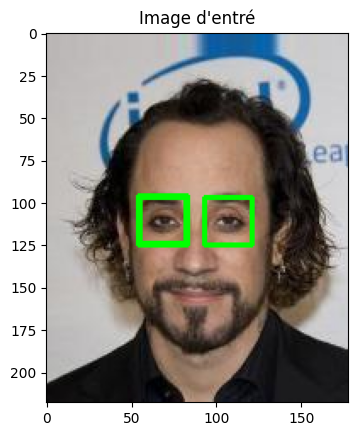

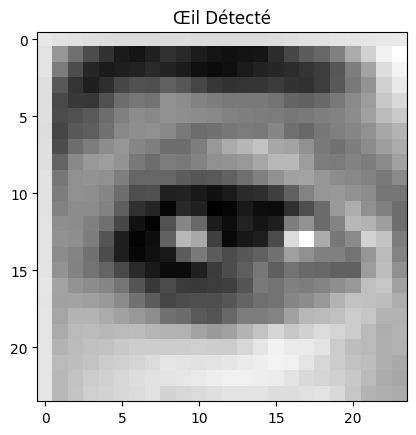

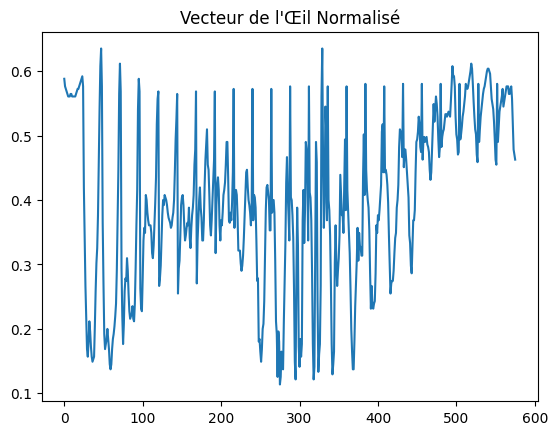

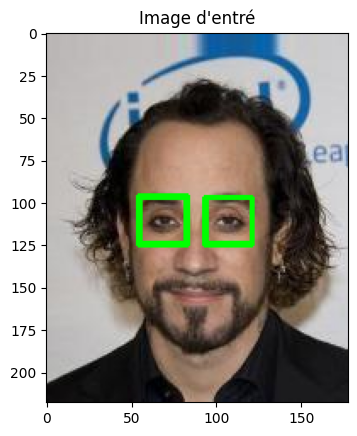

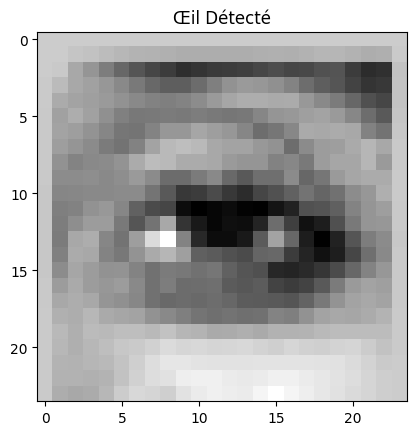

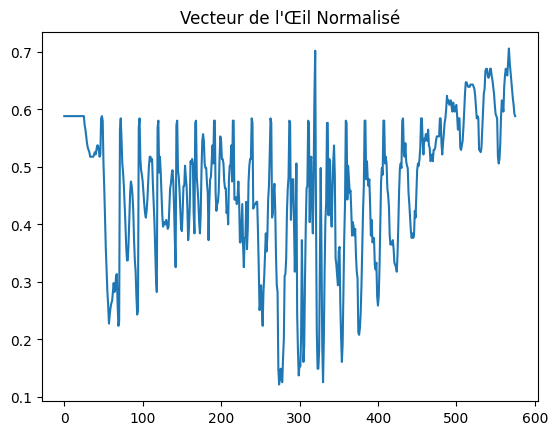

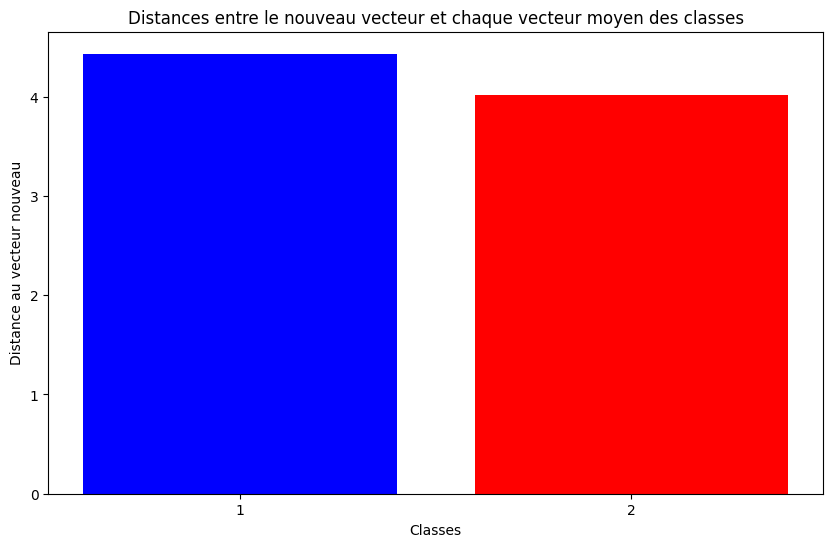

La classe prédite pour la nouvelle image est : 2
On charge l'image 142878.jpg
Impossible de charger l'image 142878.jpg.


In [33]:
import json

# Supposons que 'nouveau_vecteur' est le vecteur de la nouvelle image
# et que 'vecteurs_moyens' est le dictionnaire de vos vecteurs moyens

# Chemin vers votre fichier JSON
fichier_json = '../Data/mean_vectors_2_labels.json'

# Charger les vecteurs moyens à partir du fichier JSON
with open(fichier_json, 'r') as file:
    vecteurs_moyens = json.load(file)
    
if img is None:
    print("Erreur lors du chargement de l'image. Vérifiez le chemin.")
else:
    print(f"Envoie de l'image {img.shape} dans vectoriser_oeil_v2")
    # Continuez avec le traitement de l'image
    nouveau_vecteur = vectoriser_oeil_v2(img, show_results=True, scale_factor=1.2)

    if nouveau_vecteur is None or len(nouveau_vecteur) == 0:
        print("Aucun œil détecté ou erreur dans la vectorisation de l'image. Len = ", len(nouveau_vecteur))
    else:
        # Classification
        #classe_predite = classifier(nouveau_vecteur, vecteurs_moyens)
        
        # Classification avec un graphique
        classe_predite = classifier_avec_graphique(nouveau_vecteur, vecteurs_moyens)
    
        print(f"La classe prédite pour la nouvelle image est : {classe_predite}")
        pick_random_img_in_label(classe_predite)

# Amélioration 

Afin d'améliorer la précision du programme on pourrait retenir les meilleurs résultats de distance par rapport aux yeux. Faire de même pour le nez, la bouche ou/et d'autres. Puis faire un score globale et choisir le label qui revient le plus souvent.

Pour choisir les meilleurs résultat on pourrait prendre le meilleur et ceux qui sont à moins de 10 % du meilleur. Ou plus simplement les 5 meilleurs par exemple.